In [1]:
!pip install numpy
!pip install pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('insurance.csv', encoding='latin-1')

## Data Analysis

In [4]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Outlier detection 

Text(0, 0.5, 'Count')

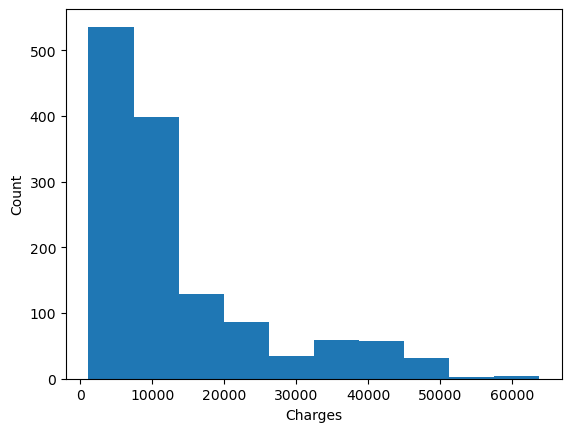

In [8]:
import matplotlib.pyplot as plt
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')

In [9]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In this we use the z-score method for handling outliers

In [10]:
mean = np.mean(data['charges'])
std = np.std(data['charges'])
mean,std

(13270.422265141257, 12105.484975561605)

In [11]:
data['charges_z_score'] = (data['charges'] - mean)/std
data.head(5)

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   charges_z_score  
0         0.298584  
1        -0.953689  
2        -0.728675  
3         0.719843  
4        -0.776802

In [12]:
data[data['charges_z_score']>3]

age     sex     bmi  children smoker     region      charges  \
34     28    male  36.400         1    yes  southwest  51194.55914   
543    54  female  47.410         0    yes  southeast  63770.42801   
577    31  female  38.095         1    yes  northeast  58571.07448   
819    33  female  35.530         0    yes  northwest  55135.40209   
1146   60    male  32.800         0    yes  southwest  52590.82939   
1230   52    male  34.485         3    yes  northwest  60021.39897   
1300   45    male  30.360         0    yes  southeast  62592.87309   

      charges_z_score  
34           3.132806  
543          4.171663  
577          3.742159  
819          3.458348  
1146         3.248148  
1230         3.861966  
1300         4.074389

In [13]:
data[data['charges_z_score']<-3]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, charges_z_score]
Index: []

Removing outliers using z-score method

In [14]:
outlier_indexes = []
outlier_indexes.extend(data.index[data['charges_z_score']>3].tolist())
outlier_indexes.extend(data.index[data['charges_z_score']<-3].tolist())
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [15]:
new_data = data.drop(data.index[outlier_indexes])
new_data.head(5)

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   charges_z_score  
0         0.298584  
1        -0.953689  
2        -0.728675  
3         0.719843  
4        -0.776802

In [16]:
data.shape[0], new_data.shape[0]

(1338, 1331)

In [17]:
data = new_data.drop('charges_z_score', axis=1)
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Text(0, 0.5, 'Count')

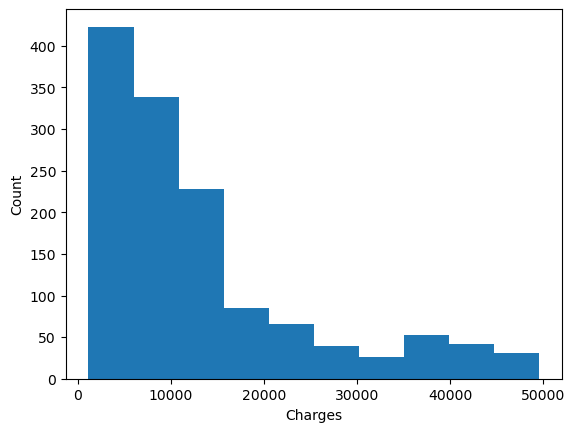

In [18]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')

### Data Preprocessing and EDA

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


### Age 

Text(0, 0.5, 'Count')

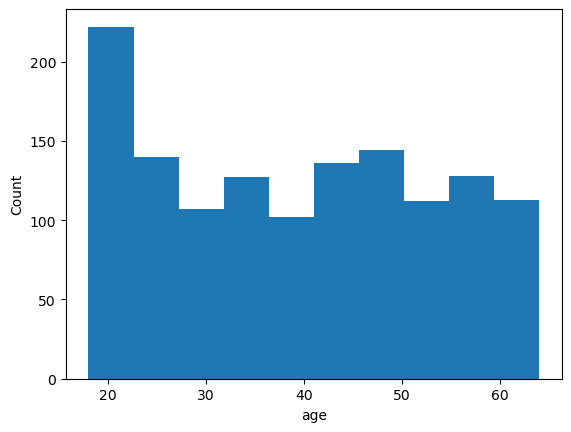

In [20]:
plt.hist(data["age"], 10)
plt.xlabel('age')
plt.ylabel('Count')

Relationship between age and charges

Text(0, 0.5, 'Charges')

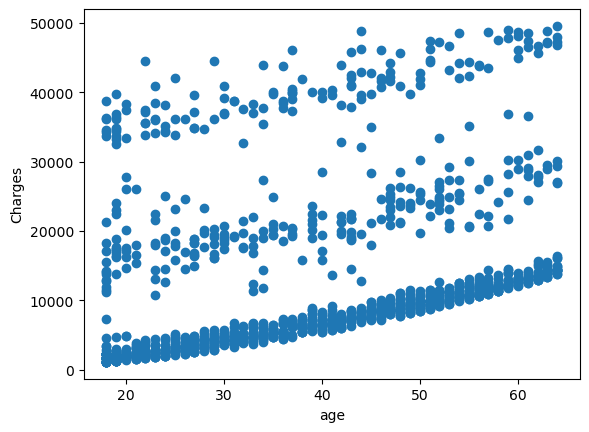

In [21]:
y1=np.array(data.charges)
x1=np.array(data.age)
plt.scatter(x1,y1)
plt.xlabel('age')
plt.ylabel('Charges')

### Sex

In [22]:
data['sex'].value_counts()

sex
male      672
female    659
Name: count, dtype: int64

Text(0, 0.5, 'Count')

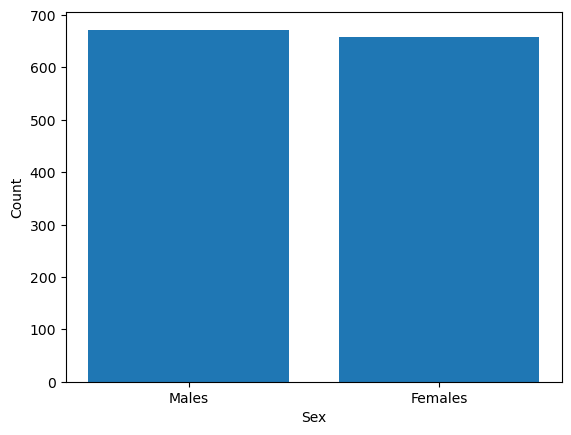

In [23]:
sizes=np.array(data['sex'].value_counts())
labels=["Males","Females"]
plt.bar(labels,sizes)
plt.xlabel('Sex')
plt.ylabel('Count')

Relations ship between age and charges 

<Axes: title={'center': 'charges'}, xlabel='sex'>

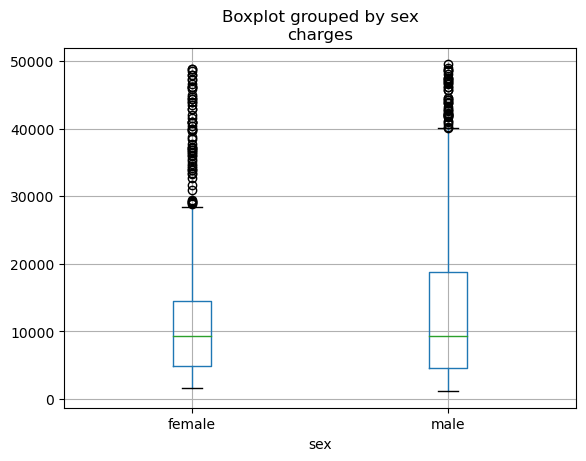

In [24]:
data.boxplot(by ='sex', column =['charges'])

### BMI 

Text(0, 0.5, 'Count')

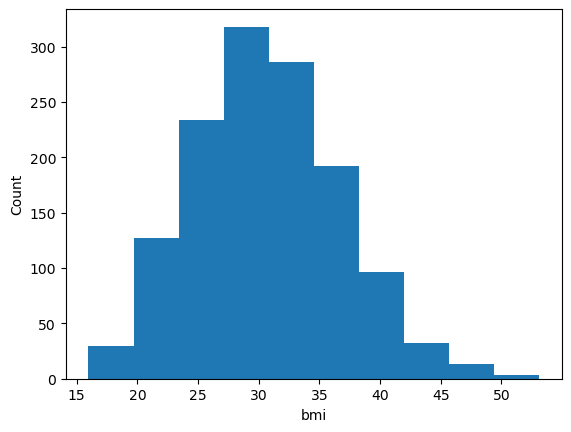

In [25]:
plt.hist(data["bmi"], 10)
plt.xlabel('bmi')
plt.ylabel('Count')

Text(0, 0.5, 'Charges')

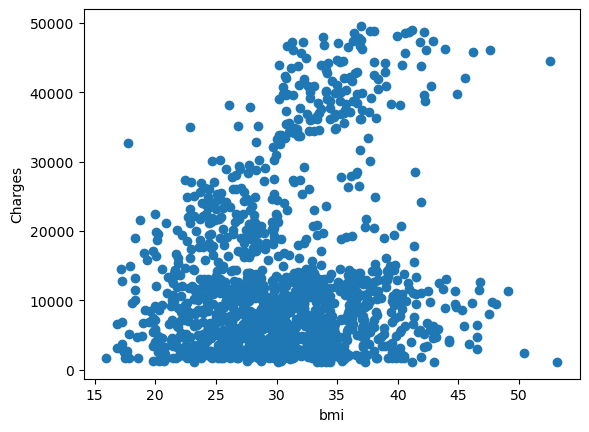

In [26]:
y2=np.array(data.charges)
x2=np.array(data.bmi)
plt.scatter(x2,y2)
plt.xlabel('bmi')
plt.ylabel('Charges')

### children 

In [27]:
data['children'].value_counts()

children
0    570
1    322
2    240
3    156
4     25
5     18
Name: count, dtype: int64

Text(0, 0.5, 'Count')

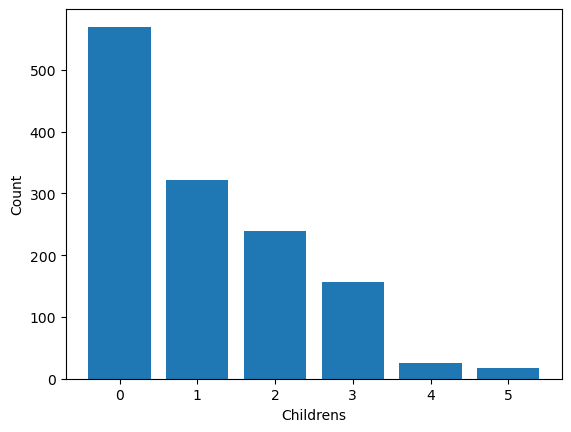

In [28]:
sizes=np.array(data['children'].value_counts())
labels=["0","1","2","3","4","5"]
plt.bar(labels,sizes)
plt.xlabel('Childrens')
plt.ylabel('Count')

<Axes: title={'center': 'charges'}, xlabel='children'>

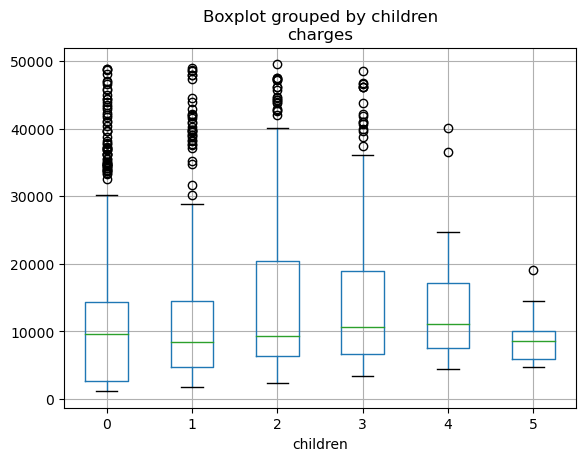

In [29]:
data.boxplot(by ='children', column =['charges'])

### Smoker 

In [30]:
data['smoker'].value_counts()

smoker
no     1064
yes     267
Name: count, dtype: int64

Text(0, 0.5, 'Count')

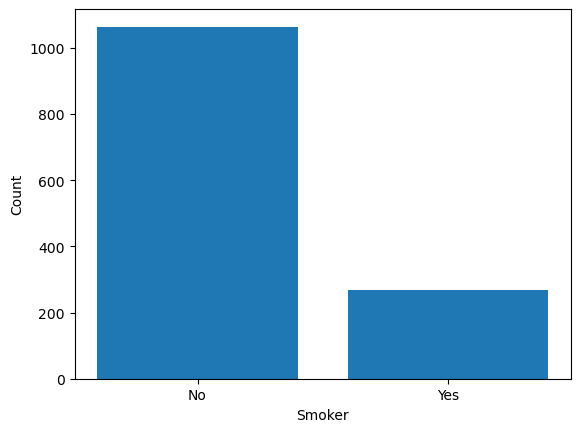

In [31]:
sizes=np.array(data['smoker'].value_counts())
labels=["No","Yes"]
plt.bar(labels,sizes)
plt.xlabel('Smoker')
plt.ylabel('Count')

<Axes: title={'center': 'charges'}, xlabel='smoker'>

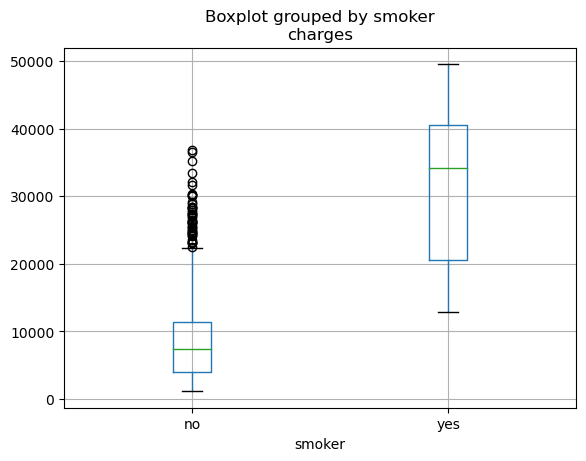

In [32]:
data.boxplot(by ='smoker', column =['charges'])

### Region

In [33]:
data['region'].value_counts()

region
southeast    362
southwest    323
northwest    323
northeast    323
Name: count, dtype: int64

Text(0, 0.5, 'Count')

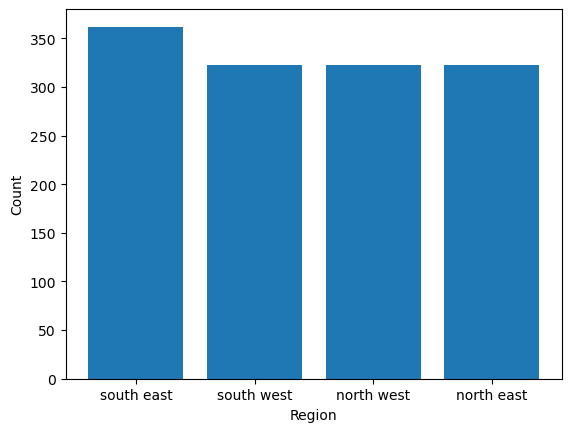

In [34]:
sizes=np.array(data['region'].value_counts())
labels=["south east","south west","north west","north east"]
plt.bar(labels,sizes)
plt.xlabel('Region')
plt.ylabel('Count')

<Axes: title={'center': 'charges'}, xlabel='region'>

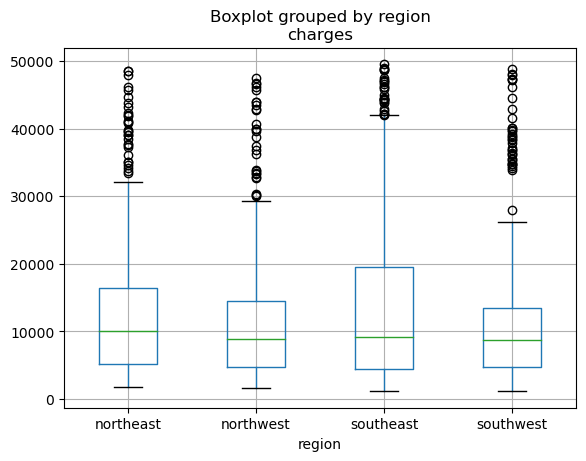

In [35]:
data.boxplot(by ='region', column =['charges'])

In [36]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### One Hot Encording 

In [37]:
data["children"]=data["children"].astype("category")

In [38]:
data = pd.get_dummies(data)

In [39]:
data.head(2)

age    bmi     charges  sex_female  sex_male  children_0  children_1  \
0   19  27.90  16884.9240        True     False        True       False   
1   18  33.77   1725.5523       False      True       False        True   

   children_2  children_3  children_4  children_5  smoker_no  smoker_yes  \
0       False       False       False       False      False        True   
1       False       False       False       False       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False

In [40]:
data=data.drop(['smoker_no', 'sex_female'], axis=1)

In [41]:
data.corr()["charges"]

age                 0.304561
bmi                 0.187061
charges             1.000000
sex_male            0.057519
children_0         -0.073611
children_1         -0.027408
children_2          0.081685
children_3          0.063316
children_4          0.009629
children_5         -0.042557
smoker_yes          0.785617
region_northeast    0.011122
region_northwest   -0.043506
region_southeast    0.074787
region_southwest   -0.045242
Name: charges, dtype: float64

In [42]:
data.head()

age     bmi      charges  sex_male  children_0  children_1  children_2  \
0   19  27.900  16884.92400     False        True       False       False   
1   18  33.770   1725.55230      True       False        True       False   
2   28  33.000   4449.46200      True       False       False       False   
3   33  22.705  21984.47061      True        True       False       False   
4   32  28.880   3866.85520      True        True       False       False   

   children_3  children_4  children_5  smoker_yes  region_northeast  \
0       False       False       False        True             False   
1       False       False       False       False             False   
2        True       False       False       False             False   
3       False       False       False       False             False   
4       False       False       False       False             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False

## Model bulding and selection 

In [43]:
X = data.drop('charges', axis=1)
y = data['charges']

In [44]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [45]:
!pip install xgboost

### Divide dataset into training and testing set 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
X_train.shape, X_test.shape

((998, 14), (333, 14))

###  model training

In [48]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Ridge
ridge = Ridge()
model_acc(ridge)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)
 
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_acc(xgb)


LinearRegression() --> 0.7874204801359358
Ridge() --> 0.7870283956882391
Lasso() --> 0.787348840316315
DecisionTreeRegressor() --> 0.6584130454575328
RandomForestRegressor() --> 0.8401851929895944
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) --> 0.8149168831577694


### Hyperparameter Tuning 

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson','friedman_mse']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.8434906617410969

In [57]:
best_model

RandomForestRegressor()

In [58]:
X_test.columns

Index(['age', 'bmi', 'sex_male', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

### Save Model


In [59]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [60]:
pred_value = best_model.predict([[28, 38.22, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])
pred_value

C:\Users\Anjana Jayasinghe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8226.597911])